# Abstract

Collecting the data from https://www.kaggle.com/c/bike-sharing-demand/data. 

# Data Analysis

## Import Libraries

In [145]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

In [11]:
df=pd.read_csv("data/train.csv", sep=',')

In [12]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [13]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [14]:
df.isnull().sum().sum()

0

In [15]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,4 mins 33 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,17 days
H2O cluster name:,H2O_from_python_bonnie_5m6uoz
H2O cluster total nodes:,1
H2O cluster free memory:,1.763 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [16]:
df=h2o.import_file(path = "data/train.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [17]:
df.describe()

Rows:10886
Cols:12




,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
type,time,int,int,int,int,real,real,int,real,int,int,int
mins,1293840000000.0,1.0,0.0,0.0,1.0,0.82,0.76,0.0,0.0,0.0,0.0,1.0
mean,1324965382399.412,2.5066139996325556,0.02856880396839978,0.6808745177291935,1.418427337865148,20.23085981995223,23.655084052911995,61.88645967297444,12.7993954069447,36.02195480433585,155.5521771082124,191.5741319125483
maxs,1355958000000.0,4.0,1.0,1.0,4.0,41.0,45.455,100.0,56.9969,367.0,886.0,977.0
sigma,18187689411.513103,1.116174309344325,0.16659885062470955,0.4661591687997356,0.6338385858190958,7.791589843987565,8.474600626484944,19.245033277394686,8.16453732683869,49.960476572649526,151.03903308192454,181.14445383028533
zeros,0,0,10575,3474,0,0,0,22,1313,986,15,0
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,2011-01-01 00:00:00,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,5.0,27.0,32.0


In [18]:
target = 'count'

In [19]:
X  = [name for name in df.columns if name != target]
print(X)

['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']


In [20]:
# Set target and predictor variables
y = target
project = 'ass_4'

In [22]:
def get_leaderBoard(runtime):
    aml = H2OAutoML(max_runtime_secs=runtime, 
                    project_name = project)
    aml.train(x=X, y=y, training_frame=df)
    
    board = aml.leaderboard    
    print ('get_leaderBoard done')
    return board

In [26]:
def get_BestModel(board):
    id = board[0,'model_id']
    best_model = h2o.get_model(id)
    return best_model

In [28]:
runtime = 1000
leaderBoard = get_leaderBoard(runtime)
leaderBoard


AutoML progress: |████████████████████████████████████████████████████████| 100%
get_leaderBoard done


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_grid_1_AutoML_20190418_150539_model_1,11.9027,3.45003,11.9027,1.7399,0.0262831
GBM_1_AutoML_20190418_150539,13.704,3.70189,13.704,2.32204,0.0551553
GBM_2_AutoML_20190418_150539,15.8549,3.98183,15.8549,2.50558,0.0595125
DeepLearning_grid_1_AutoML_20190418_150539_model_4,20.3287,4.50874,20.3287,3.48311,nan
XGBoost_grid_1_AutoML_20190418_150539_model_2,21.1744,4.60157,21.1744,3.0314,nan
DeepLearning_1_AutoML_20190418_150539,26.5302,5.15075,26.5302,3.84082,nan
XGBoost_3_AutoML_20190418_150539,28.3397,5.3235,28.3397,3.63725,0.118656
XGBoost_1_AutoML_20190418_150539,30.8579,5.55499,30.8579,3.45657,0.0929764
XGBoost_2_AutoML_20190418_150539,33.6662,5.80226,33.6662,3.79085,nan
GLM_grid_1_AutoML_20190418_150539_model_1,34.3276,5.85898,34.3276,4.25956,0.248612


In [96]:
best_model = get_BestModel(leaderBoard)
best_model

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_20190418_150539_model_1


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 1.9911587935037478
RMSE: 1.4110842616597168
MAE: 0.716450127410074
RMSLE: 0.013114553532180096
Mean Residual Deviance: 1.9911587935037478

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 11.902695606672456
RMSE: 3.4500283486766388
MAE: 1.7399010873239362
RMSLE: 0.026283137268489295
Mean Residual Deviance: 11.902695606672456
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,1.7398878,0.0547269,1.88476,1.65481,1.7011192,1.7295053,1.7292446
mean_residual_deviance,11.90242,1.0787481,14.89811,11.0693445,11.642943,11.163583,10.738121
mse,11.90242,1.0787481,14.89811,11.0693445,11.642943,11.163583,10.738121
r2,0.9996371,0.0000330,0.9995476,0.9996521,0.9996412,0.9996638,0.9996808
residual_deviance,11.90242,1.0787481,14.89811,11.0693445,11.642943,11.163583,10.738121
rmse,3.4434295,0.1503562,3.859807,3.3270624,3.4121757,3.3411949,3.2769072
rmsle,0.0261254,0.0020302,0.0307319,0.0282747,0.0241249,0.0235618,0.0239337


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2019-04-18 15:17:44,11.939 sec,0.0,181.1361336,142.7113874,32810.2988862
,2019-04-18 15:17:44,12.024 sec,5.0,119.7549741,94.1888850,14341.2538133
,2019-04-18 15:17:44,12.112 sec,10.0,79.2968247,62.1927288,6287.9864059
,2019-04-18 15:17:44,12.194 sec,15.0,52.4513680,41.0523740,2751.1460001
,2019-04-18 15:17:44,12.276 sec,20.0,34.7639025,27.0985992,1208.5289190
---,---,---,---,---,---,---
,2019-04-18 15:17:45,13.657 sec,125.0,1.4836148,0.7422293,2.2011128
,2019-04-18 15:17:46,13.706 sec,130.0,1.4617350,0.7338121,2.1366691
,2019-04-18 15:17:46,13.754 sec,135.0,1.4384960,0.7264544,2.0692708
,2019-04-18 15:17:46,13.803 sec,140.0,1.4161491,0.7181322,2.0054783



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
registered,1481947008.0000000,1.0,0.8273419
casual,156408896.0000000,0.1055428,0.0873200
atemp,104867496.0000000,0.0707633,0.0585455
datetime,30660816.0000000,0.0206895,0.0171173
humidity,11656474.0000000,0.0078656,0.0065076
workingday,2969217.7500000,0.0020036,0.0016577
temp,2368238.7500000,0.0015981,0.0013221
windspeed,176406.1718750,0.0001190,0.0000985
season,97124.8671875,0.0000655,0.0000542
holiday,38594.8671875,0.0000260,0.0000215


In [111]:
dfdd = best_model.summary()
dfdd

Model Summary: 


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,142.0,142.0,511364.0,13.0,13.0,13.0,35.0,505.0,281.22534


In [33]:
leaderboard = leaderBoard.as_data_frame()
leaderboard

,model_id,mean_residual_deviance,rmse,mse,mae,rmsle
0,GBM_grid_1_AutoML_20190418_150539_model_1,11.902696,3.450028,11.902696,1.739901,0.026283
1,GBM_1_AutoML_20190418_150539,13.703970,3.701887,13.703970,2.322036,0.055155
2,GBM_2_AutoML_20190418_150539,15.854942,3.981826,15.854942,2.505582,0.059512
3,DeepLearning_grid_1_AutoML_20190418_150539_mod...,20.328703,4.508736,20.328703,3.483105,NaN
4,XGBoost_grid_1_AutoML_20190418_150539_model_2,21.174409,4.601566,21.174409,3.031400,NaN
5,DeepLearning_1_AutoML_20190418_150539,26.530193,5.150747,26.530193,3.840819,NaN
6,XGBoost_3_AutoML_20190418_150539,28.339685,5.323503,28.339685,3.637246,0.118656
7,XGBoost_1_AutoML_20190418_150539,30.857935,5.554992,30.857935,3.456566,0.092976
8,XGBoost_2_AutoML_20190418_150539,33.666172,5.802256,33.666172,3.790851,NaN
9,GLM_grid_1_AutoML_20190418_150539_model_1,34.327598,5.858976,34.327598,4.259560,0.248612


In [34]:
# importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl

import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [36]:
mdf=pd.read_csv("data/train.csv", decimal = ',')
mdf

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.88,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.2,12.88,86,0,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0,8,6,14


In [37]:
mdf.describe()

,season,holiday,workingday,weather,humidity,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,61.886460,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,19.245033,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,47.000000,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,62.000000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,77.000000,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,100.000000,367.000000,886.000000,977.000000


In [39]:
mdf.isnull().sum().sum()

0

In [53]:
pd.get_dummies(mdf['season'])

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,1,0,0,0


In [54]:
onehot_encoding_season = pd.get_dummies(mdf['season'], prefix = 'season')
mdf = mdf.drop('season', 1)
mdf = pd.concat([mdf, onehot_encoding_season], axis=1)
mdf.rename(columns={'season_1':'season_spring', 
                    'season_2':'season_summer', 
                    'season_3':'season_fall', 
                    'season_4':'season_winter'}, inplace = True)

mdf

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_spring,season_summer,season_fall,season_winter
0,2011-01-01 00:00:00,0,0,1,9.84,14.395,81,0,3,13,16,1,0,0,0
1,2011-01-01 01:00:00,0,0,1,9.02,13.635,80,0,8,32,40,1,0,0,0
2,2011-01-01 02:00:00,0,0,1,9.02,13.635,80,0,5,27,32,1,0,0,0
3,2011-01-01 03:00:00,0,0,1,9.84,14.395,75,0,3,10,13,1,0,0,0
4,2011-01-01 04:00:00,0,0,1,9.84,14.395,75,0,0,1,1,1,0,0,0
5,2011-01-01 05:00:00,0,0,2,9.84,12.88,75,6.0032,0,1,1,1,0,0,0
6,2011-01-01 06:00:00,0,0,1,9.02,13.635,80,0,2,0,2,1,0,0,0
7,2011-01-01 07:00:00,0,0,1,8.2,12.88,86,0,1,2,3,1,0,0,0
8,2011-01-01 08:00:00,0,0,1,9.84,14.395,75,0,1,7,8,1,0,0,0
9,2011-01-01 09:00:00,0,0,1,13.12,17.425,76,0,8,6,14,1,0,0,0


In [55]:
pd.get_dummies(mdf['weather'])

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,0,1,0,0
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,1,0,0,0


In [56]:
onehot_encoding_weather = pd.get_dummies(mdf['weather'], prefix = 'weather')
mdf = mdf.drop('weather', 1)
mdf = pd.concat([mdf, onehot_encoding_weather], axis=1)
mdf.rename(columns={'weather_1':'weather_Clear', 
                    'weather_2':'weather_Mist', 
                    'weather_3':'weather_Light', 
                    'weather_4':'weather_Heavy'}, inplace = True)

mdf

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_spring,season_summer,season_fall,season_winter,weather_Clear,weather_Mist,weather_Light,weather_Heavy
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0,3,13,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0,8,32,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0,5,27,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0,3,10,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0,0,1,1,1,0,0,0,1,0,0,0
5,2011-01-01 05:00:00,0,0,9.84,12.88,75,6.0032,0,1,1,1,0,0,0,0,1,0,0
6,2011-01-01 06:00:00,0,0,9.02,13.635,80,0,2,0,2,1,0,0,0,1,0,0,0
7,2011-01-01 07:00:00,0,0,8.2,12.88,86,0,1,2,3,1,0,0,0,1,0,0,0
8,2011-01-01 08:00:00,0,0,9.84,14.395,75,0,1,7,8,1,0,0,0,1,0,0,0
9,2011-01-01 09:00:00,0,0,13.12,17.425,76,0,8,6,14,1,0,0,0,1,0,0,0


In [57]:
mdf.describe()

,holiday,workingday,humidity,casual,registered,count,season_spring,season_summer,season_fall,season_winter,weather_Clear,weather_Mist,weather_Light,weather_Heavy
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,61.886460,36.021955,155.552177,191.574132,0.246739,0.251056,0.251056,0.251148,0.660665,0.260334,0.078909,0.000092
std,0.166599,0.466159,19.245033,49.960477,151.039033,181.144454,0.431133,0.433641,0.433641,0.433694,0.473505,0.438837,0.269609,0.009584
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,47.000000,4.000000,36.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,62.000000,17.000000,118.000000,145.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,77.000000,49.000000,222.000000,284.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,100.000000,367.000000,886.000000,977.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
type(mdf['temp'][0])

str

In [62]:
mdf['temp']= pd.to_numeric(mdf['temp'])

In [63]:
type(mdf['temp'][0])

numpy.float64

In [64]:
mdf['atemp']= pd.to_numeric(mdf['atemp'])

In [65]:
mdf['windspeed']= pd.to_numeric(mdf['windspeed'])

In [66]:
mdf.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_spring,season_summer,season_fall,season_winter,weather_Clear,weather_Mist,weather_Light,weather_Heavy
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,0.246739,0.251056,0.251056,0.251148,0.660665,0.260334,0.078909,0.000092
std,0.166599,0.466159,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.431133,0.433641,0.433641,0.433694,0.473505,0.438837,0.269609,0.009584
min,0.000000,0.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
mdf.shape

(10886, 18)

In [73]:
cols = list(mdf.columns.values)
cols

['datetime',
 'holiday',
 'workingday',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count',
 'season_spring',
 'season_summer',
 'season_fall',
 'season_winter',
 'weather_Clear',
 'weather_Mist',
 'weather_Light',
 'weather_Heavy']

In [74]:
mdf = mdf[[
    'count',
    'datetime',
    'holiday',
    'workingday',
    'temp',
    'atemp',
    'humidity',
    'windspeed',
    'casual',
    'registered',
    'season_spring',
    'season_summer',
    'season_fall',
    'season_winter',
    'weather_Clear',
    'weather_Mist',
    'weather_Light',
    'weather_Heavy']]

In [75]:
mdf.corr()

,count,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,season_spring,season_summer,season_fall,season_winter,weather_Clear,weather_Mist,weather_Light,weather_Heavy
count,1.000000,-0.005393,0.011594,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,-0.237704,0.075681,0.136942,0.023704,0.105246,-0.041329,-0.117519,-0.001459
holiday,-0.005393,1.000000,-0.250491,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.007336,-0.038250,0.022790,0.022751,-0.001708,0.013868,-0.019514,-0.001644
workingday,0.011594,-0.250491,1.000000,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,-0.000379,0.014620,-0.007194,-0.007048,-0.024078,0.003324,0.036643,0.006562
temp,0.394454,0.000295,0.029966,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,-0.565655,0.192661,0.635975,-0.266220,0.058430,-0.046925,-0.025715,-0.014800
atemp,0.389784,-0.005215,0.024660,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,-0.569082,0.204421,0.607090,-0.245690,0.055825,-0.040792,-0.031154,-0.013901
humidity,-0.317371,0.001929,-0.010880,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.166208,-0.031095,0.067308,0.129018,-0.374837,0.222398,0.295894,0.012010
windspeed,0.101369,0.008409,0.013373,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.128819,0.042991,-0.091521,-0.079535,0.015920,-0.045016,0.045597,-0.007979
casual,0.690414,0.043799,-0.319111,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,-0.235222,0.132405,0.187726,-0.086258,0.119728,-0.062184,-0.108853,-0.005760
registered,0.970948,-0.020956,0.119460,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,-0.207278,0.046969,0.102142,0.056961,0.086621,-0.028997,-0.104936,0.000155
season_spring,-0.237704,-0.007336,-0.000379,-0.565655,-0.569082,-0.166208,0.128819,-0.235222,-0.207278,1.000000,-0.331365,-0.331365,-0.331446,-0.006996,0.007644,-0.000750,0.016747


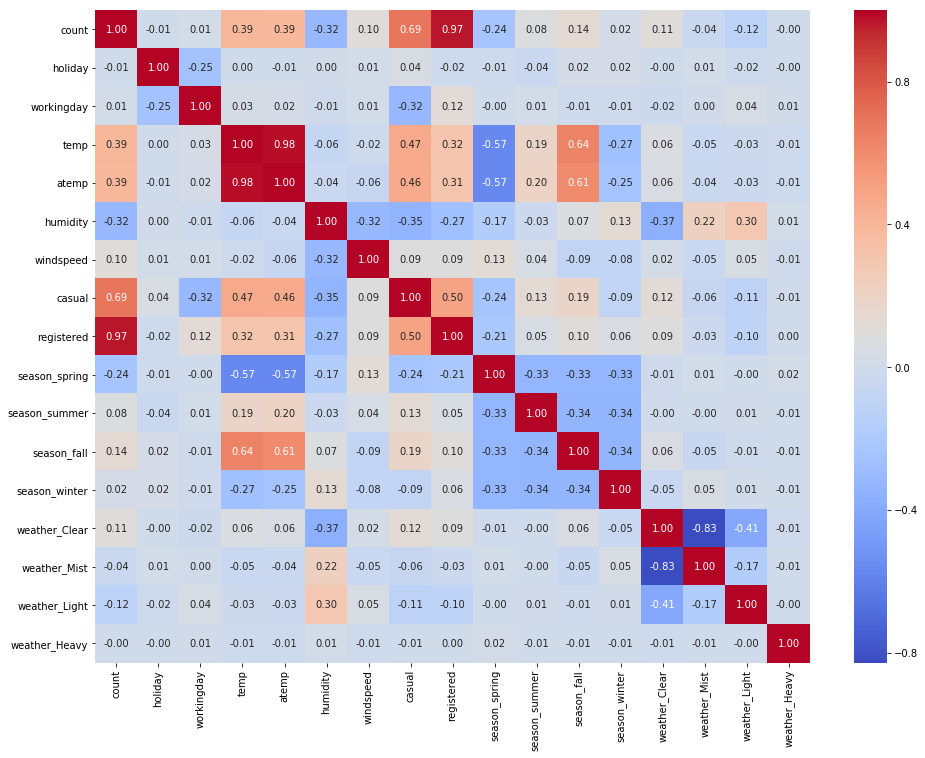

In [76]:
plt.figure(figsize=(16,12))
sns.heatmap(data=mdf.iloc[:,:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [78]:
col_m = ['count',    
    'temp',
    'atemp',
    'humidity',
    'casual',
    'registered',
    'season_spring']

mdf_plot = pd.DataFrame(mdf,columns = col_m)
mdf_plot.head()

,count,temp,atemp,humidity,casual,registered,season_spring
0,16,9.84,14.395,81,3,13,1
1,40,9.02,13.635,80,8,32,1
2,32,9.02,13.635,80,5,27,1
3,13,9.84,14.395,75,3,10,1
4,1,9.84,14.395,75,0,1,1


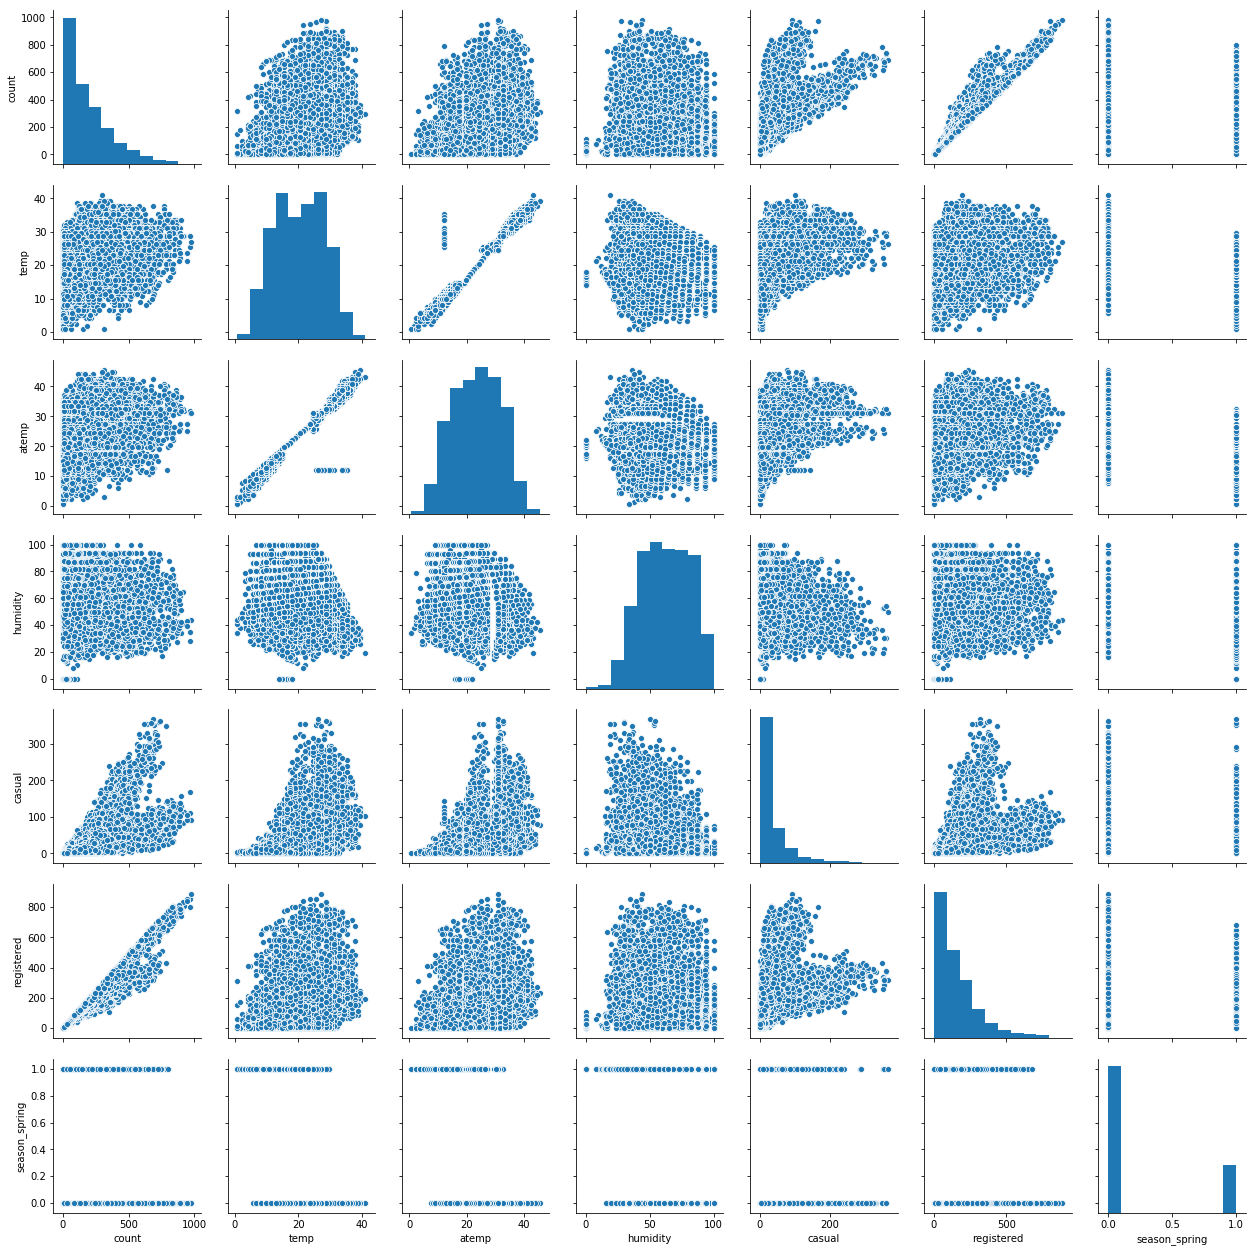

In [79]:
# Quick plot of the data using seaborn
sns.pairplot(mdf_plot)
plt.show()

In [80]:
mdf_plot.describe()

,count,temp,atemp,humidity,casual,registered,season_spring
count,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,191.574132,20.23086,23.655084,61.886460,36.021955,155.552177,0.246739
std,181.144454,7.79159,8.474601,19.245033,49.960477,151.039033,0.431133
min,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,13.94000,16.665000,47.000000,4.000000,36.000000,0.000000
50%,145.000000,20.50000,24.240000,62.000000,17.000000,118.000000,0.000000
75%,284.000000,26.24000,31.060000,77.000000,49.000000,222.000000,0.000000
max,977.000000,41.00000,45.455000,100.000000,367.000000,886.000000,1.000000


In [84]:
x=mdf_plot[['temp',
    'atemp',
    'humidity',
    'casual',
    'registered',
    'season_spring']]
y= mdf_plot[['count']]

In [85]:
## Linear Model 1
predictors = x
# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(predictors, y)

# Print the coefficients
print ("results.intercept_ = ", results.intercept_,",  results.coef_ = ",results.coef_)

# import statsmodels.api as sm
# Note the swap of X and y
# 
X2 = sm.add_constant(predictors)
model = sm.OLS(y, X2)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

results.intercept_ =  [-2.84217094e-14] ,  results.coef_ =  [[-5.26320178e-14  3.79680850e-14 -1.64520631e-16  1.00000000e+00
   1.00000000e+00  9.77459296e-15]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.289e+33
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        00:01:28   Log-Likelihood:             3.0209e+05
No. Observations:               10886   AIC:                        -6.042e+05
Df Residuals:                   10879   BIC:                        -6.041e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.842e-13   1.21e-14     23.495      0.000    2.61e-13    3.08e-13
temp           3.844e-15   1.55e-15      2.486      0.013    8.14e-16    6.87e-15
atemp          -9.77e-15   1.42e-15     -6.877      0.000   -1.26e-14   -6.99e-15
humidity      -2.387e-15   1.21e-16    -19.757      0.000   -2.62e-15   -2.15e-15
casual            1.0000   5.36e-17   1.87e+16      0.000       1.000       1.000
registered        1.0000    1.6e-17   6.24e+16      0.000       1.000       1.000
season_spring  6.395e-14   6.02e-15     10.623      0.000    5.21e-14    7.57e-14
==============================================================================
Omnibus:                     1648.159   Durbin-Watson:                   0.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3181.281
Skew:                           0.945   Prob(JB):                         0.00
Kurtosis:                       4.856   Cond. No.                     1.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
predictors = ['temp',
    'atemp',
    'humidity',
    'casual',
    'registered',
    'season_spring']

X = mdf_plot[predictors]  
y = mdf_plot['count']

if __name__ == "__main__":
    model = Lasso() 
    alpha_can = np.logspace(-3, 2, 10)
    print ('alpha_can = ', alpha_can)
    lasso_model = GridSearchCV(model, param_grid={'alpha': alpha_can}, cv=5) 
    lasso_model.fit(x, y)
    print ('lasso_model.best_params：', lasso_model.best_params_)  
    
    y_hat = lasso_model.predict(x)
    print ('lasso_model.score = ',lasso_model.score(x, y))

alpha_can =  [1.00000000e-03 3.59381366e-03 1.29154967e-02 4.64158883e-02
 1.66810054e-01 5.99484250e-01 2.15443469e+00 7.74263683e+00
 2.78255940e+01 1.00000000e+02]
lasso_model.best_params： {'alpha': 0.003593813663804626}
lasso_model.score =  0.9999999999998067


In [91]:
# import the relevant module
import statsmodels.api as sm

# separate our my predictor variables (X) from my outcome variable y

predictors = ['temp',
    'atemp',
    'humidity',
    'casual',
    'registered',
    'season_spring']



X = mdf_plot[predictors]  
y = mdf_plot['count']

# Add a constant to the predictor variable set to represent the Bo intercept
X = sm.add_constant(X)  
X.ix[:10, :11]

,const,temp,atemp,humidity,casual,registered,season_spring
0,1.0,9.84,14.395,81,3,13,1
1,1.0,9.02,13.635,80,8,32,1
2,1.0,9.02,13.635,80,5,27,1
3,1.0,9.84,14.395,75,3,10,1
4,1.0,9.84,14.395,75,0,1,1
5,1.0,9.84,12.880,75,0,1,1
6,1.0,9.02,13.635,80,2,0,1
7,1.0,8.20,12.880,86,1,2,1
8,1.0,9.84,14.395,75,1,7,1
9,1.0,13.12,17.425,76,8,6,1


In [92]:
# (1) select a significance value
alpha = 0.05

# (2) Fit the model
model = sm.OLS(y, X).fit()

# (3) evaluate the coefficients' p-values
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.289e+33
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        00:52:51   Log-Likelihood:             3.0209e+05
No. Observations:               10886   AIC:                        -6.042e+05
Df Residuals:                   10879   BIC:                        -6.041e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.842e-13   1.21e-14     23.495      0.000    2.61e-13    3.08e-13
temp           3.844e-15   1.55e-15      2.486      0.013    8.14e-16    6.87e-15
atemp          -9.77e-15   1.42e-15     -6.877      0.000   -1.26e-14   -6.99e-15
humidity      -2.387e-15   1.21e-16    -19.757      0.000   -2.62e-15   -2.15e-15
casual            1.0000   5.36e-17   1.87e+16      0.000       1.000       1.000
registered        1.0000    1.6e-17   6.24e+16      0.000       1.000       1.000
season_spring  6.395e-14   6.02e-15     10.623      0.000    5.21e-14    7.57e-14
==============================================================================
Omnibus:                     1648.159   Durbin-Watson:                   0.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3181.281
Skew:                           0.945   Prob(JB):                         0.00
Kurtosis:                       4.856   Cond. No.                     1.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
# (3) cont. - Identify the predictor with the greatest p-value and assess if its > our selected alpha.
#             based off the table it is clear that room_count & bathroom_count has the greatest p-value 
#             and that it is greater than our alpha of 0.05

# (4) - Use pandas drop function to remove this column from X
X = X.drop('temp', axis=1)


# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.067e+33
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        00:54:01   Log-Likelihood:             3.0006e+05
No. Observations:               10886   AIC:                        -6.001e+05
Df Residuals:                   10880   BIC:                        -6.001e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.121e-13   1.46e-14    -28.310      0.000   -4.41e-13   -3.84e-13
atemp          1.954e-14   3.91e-16     49.950      0.000    1.88e-14    2.03e-14
humidity      -1.055e-15   1.45e-16     -7.298      0.000   -1.34e-15   -7.71e-16
casual            1.0000   6.45e-17   1.55e+16      0.000       1.000       1.000
registered        1.0000   1.93e-17   5.18e+16      0.000       1.000       1.000
season_spring          0   7.23e-15          0      1.000   -1.42e-14    1.42e-14
==============================================================================
Omnibus:                      290.187   Durbin-Watson:                   0.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.852
Skew:                          -0.413   Prob(JB):                     1.16e-68
Kurtosis:                       2.913   Cond. No.                     1.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
# (3) cont. - Identify the predictor with the greatest p-value and assess if its > our selected alpha.
#             based off the table it is clear that room_count & bathroom_count has the greatest p-value 
#             and that it is greater than our alpha of 0.05

# (4) - Use pandas drop function to remove this column from X
X = X.drop('season_spring', axis=1)


# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.945e+33
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        00:54:57   Log-Likelihood:             3.0212e+05
No. Observations:               10886   AIC:                        -6.042e+05
Df Residuals:                   10881   BIC:                        -6.042e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.908e-13   9.46e-15    -41.324      0.000   -4.09e-13   -3.72e-13
atemp       1.332e-14   2.78e-16     47.865      0.000    1.28e-14    1.39e-14
humidity    1.221e-15   1.16e-16     10.528      0.000    9.94e-16    1.45e-15
casual         1.0000   5.34e-17   1.87e+16      0.000       1.000       1.000
registered     1.0000   1.59e-17   6.29e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                     1715.592   Durbin-Watson:                   0.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3126.031
Skew:                          -1.005   Prob(JB):                         0.00
Kurtosis:                       4.690   Cond. No.                     1.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
glm_gamma = sm.GLM(mdf_plot)

In [ ]:
predictors = ['temp',
    'atemp',
    'humidity',
    'casual',
    'registered',
    'season_spring']

X = mdf_plot[predictors]  
y = mdf_plot['count']

#  GLM

In [113]:
median_price = mdf_plot['count'].mean()
print(median_price)

191.57413191254824


In [114]:
mdf_plot['count_highlow'] = mdf_plot['count'].apply(lambda x : 1 if x > median_price else 0)

In [117]:
mdf_plot.head()

,count,temp,atemp,humidity,casual,registered,season_spring,count_highlow
0,16,9.84,14.395,81,3,13,1,0
1,40,9.02,13.635,80,8,32,1,0
2,32,9.02,13.635,80,5,27,1,0
3,13,9.84,14.395,75,3,10,1,0
4,1,9.84,14.395,75,0,1,1,0


In [118]:
## Logistic Model 1

y = mdf_plot[['count_highlow']]
predictors = mdf_plot[['temp',
    'atemp',
    'humidity',
    'casual',
    'registered',
    'season_spring']]

logit_model=sm.Logit(y, predictors)
result=logit_model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.115075
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.829    
Dependent Variable: count_highlow    AIC:              2517.4022
Date:               2019-04-19 13:03 BIC:              2561.1736
No. Observations:   10886            Log-Likelihood:   -1252.7  
Df Model:           5                LL-Null:          -7327.1  
Df Residuals:       10880            LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     10.0000                                     
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
temp             0.0187   0.0461   0.4049 0.6856 -0.0717  0.1090
atemp           -0.2266   0.0421  -5.3879 0.0000 -0.3090 -0.1442
humidity        -0.0759   0.0031 -24.8419 0.0000 -0.0819 -0.0699
casual           0.0744   0.0034  21.8684 0.0000  0.0677  0.0811
registered       0.0503   0.0015  33.0271 0.0000  0.0473  0.0533
season_spring   -3.1316   0.1421 -22.0355 0.0000 -3.4102 -2.8531
================================================================

"""

In [ ]:
5.建模预测
（1）从处理后的数据集中提取训练集和测试集

In [128]:

y = np.log1p(mdf_plot[['count']])
x = mdf_plot[['temp',
    'atemp',
    'humidity',
    'casual',
    'registered',
    'season_spring']]

#（2）将训练集按7:3拆分，用于后期对模型评估
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

#（3）尝试多元线性回归

from sklearn.linear_model import LinearRegression

lrmodel = LinearRegression()
lrmodel.fit(x, y)
print('cross_val_score:' )
print(cross_val_score(lrmodel, x, y, cv=5).mean() )

# out: 0.79949103725964143
lrmodel.fit(x_train, y_train)
pre = lrmodel.predict(x_test)
print('mean_squared_error:' )
print(mean_squared_error(y_test, pre))

 #out: 0.34799119346039159
#得分不理想


cross_val_score:
0.6296303740902962
mean_squared_error:
0.6603587152102113


In [130]:
#（4）尝试随机森林
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor(random_state =50, max_features='sqrt', oob_score = True)

#需要对RandomForestRegressor进行调参
para = {'n_estimators': np.arange(200, 241, 1)}
rf = GridSearchCV(estimator=rfr, param_grid=para, cv=5)
rf.fit(x, y)
print(rf.best_params_)


#随机森林果然要优于多元线性回归

{'n_estimators': 206}


In [131]:
# out: {'n_estimators': 227}  #最后确定最优n_estimators为227
rfr = RandomForestRegressor(n_estimators=227, random_state =50, max_features='sqrt', oob_score = True)
print(cross_val_score(rfr, x, y, cv=5).mean())
# out: 0.84672775924306976
rfr.fit(x_train, y_train)
pre = rfr.predict(x_test)
print(mean_squared_error(y_test, pre))

# out: 0.16059907912969984

0.9966542046994821
0.0032419523410954997


In [136]:
pcc = mdf[[
    'count',
    'holiday',
    'workingday',
    'temp',
    'atemp',
    'humidity',
    'windspeed',
    'casual',
    'registered',
    'season_spring',
    'season_summer',
    'season_fall',
    'season_winter',
    'weather_Clear',
    'weather_Mist',
    'weather_Light',
    'weather_Heavy']]

pcc

,count,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,season_spring,season_summer,season_fall,season_winter,weather_Clear,weather_Mist,weather_Light,weather_Heavy
0,16,0,0,9.84,14.395,81,0.0000,3,13,1,0,0,0,1,0,0,0
1,40,0,0,9.02,13.635,80,0.0000,8,32,1,0,0,0,1,0,0,0
2,32,0,0,9.02,13.635,80,0.0000,5,27,1,0,0,0,1,0,0,0
3,13,0,0,9.84,14.395,75,0.0000,3,10,1,0,0,0,1,0,0,0
4,1,0,0,9.84,14.395,75,0.0000,0,1,1,0,0,0,1,0,0,0
5,1,0,0,9.84,12.880,75,6.0032,0,1,1,0,0,0,0,1,0,0
6,2,0,0,9.02,13.635,80,0.0000,2,0,1,0,0,0,1,0,0,0
7,3,0,0,8.20,12.880,86,0.0000,1,2,1,0,0,0,1,0,0,0
8,8,0,0,9.84,14.395,75,0.0000,1,7,1,0,0,0,1,0,0,0
9,14,0,0,13.12,17.425,76,0.0000,8,6,1,0,0,0,1,0,0,0


In [149]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = pcc.iloc[:, 1:].values, pcc.iloc[:, 0].values # 把数据与标签拆分开来
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0) # 把整个数据集的70%分为训练集，30%为测试集



In [150]:

# 下面3行代码把数据集标准化为单位方差和0均值
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)



IndexError: tuple index out of range

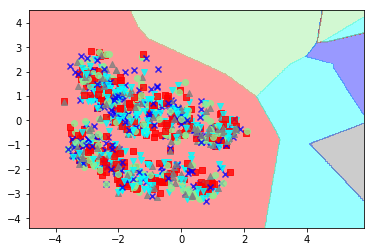

In [170]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    #設定標記生成器和顏色對映。
    markers = ('s', 'x', 'o', '^', 'v', 
               's', 'x', 'o', '^', 'v',
               's', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray','cyan',
              'red', 'blue', 'lightgreen', 'gray','cyan',
              'red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot 決定表面
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot 類樣本
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, 
                    c=cmap(idx), 
                    label=cl,
                    marker=markers[idx]
                   )

# 使用前兩個主要元件訓練邏輯迴歸分類器
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca3.png', dpi=300)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 保留2个主成分
lr = LogisticRegression() # 创建逻辑回归对象

X_train_pca = pca.fit_transform(X_train_std) # 把原始训练集映射到主成分组成的子空间中
X_test_pca = pca.transform(X_test_std) # 把原始测试集映射到主成分组成的子空间中
lr.fit(X_train_pca, y_train) # 用逻辑回归拟合数据

plot_decision_regions(X_train_pca, y_train, classifier=lr)
print (lr.score(X_test_pca, y_test))
 # 0.98 在测试集上的平均正确率为0.98
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()


## Import Data

In [2]:
train = pd.read_csv("data/labeledTrainData.tsv", header=0, 
                     delimiter="\t", quoting=3)

test = pd.read_csv( "data/testData.tsv", header=0, delimiter="\t", quoting=3 )
unlabeled_train = pd.read_csv("data/unlabeledTrainData.tsv", header=0, 
                              delimiter="\t", quoting=3 )

# Makesure all the of reviews were read (100,000 in total)
print("Read %d labeled train reviews, %d test reviews, and %d unlabeled reviews\n" 
      % (train["review"].size, test["review"].size, unlabeled_train["review"].size ))

Read 25000 labeled train reviews, 25000 test reviews, and 50000 unlabeled reviews



In [3]:
print (train.head())
print(test.head())

         id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3  "3630_4"          0  "It must be assumed that those who praised thi...
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...
           id                                             review
0  "12311_10"  "Naturally in a film who's main themes are of ...
1    "8348_2"  "This movie is a disaster within a disaster fi...
2    "5828_4"  "All in all, this is a movie for kids. We saw ...
3    "7186_2"  "Afraid of the Dark left me with the impressio...
4   "12128_7"  "A very accurate depiction of small time mob l...


In [4]:
## the first one review 
train['review'][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

## Word2vec Model

In [5]:
# Function to convert data into wordlist
def review_to_wordlist(review, remove_stopwords=False):
    # Remove HTML
    review_text = BeautifulSoup(review, 'lxml').get_text()
      
    # Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
    # Convert words to lower case and split them
    words = review_text.lower().split()

    # Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    
    # Return a list of words
    return(words)

In [6]:
# Load the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# Function to split a review into parsed sentences
def review_to_sentences( review, tokenizer, remove_stopwords=False ):
    # Use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(review.strip())
    
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append( review_to_wordlist( raw_sentence, remove_stopwords ))
    return sentences

In [7]:
# the list of the first sentense
s1 = review_to_sentences(train['review'][0], tokenizer)
s1[0]

['with',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with',
 'mj',
 'i',
 've',
 'started',
 'listening',
 'to',
 'his',
 'music',
 'watching',
 'the',
 'odd',
 'documentary',
 'here',
 'and',
 'there',
 'watched',
 'the',
 'wiz',
 'and',
 'watched',
 'moonwalker',
 'again']

In [8]:
sentences = []
print("Parsing sentences from training set")
for review in train["review"]:
    sentences += review_to_sentences(review, tokenizer)

print("Parsing sentences from unlabeled set")
for review in unlabeled_train["review"]:
    sentences += review_to_sentences(review, tokenizer)

Parsing sentences from training set


/Users/bonnie/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/Users/bonnie/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:336: UserWarning: "http://www.happierabroad.com"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


Parsing sentences from unlabeled set


/Users/bonnie/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:336: UserWarning: "http://www.archive.org/details/LovefromaStranger"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/bonnie/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:336: UserWarning: "http://www.loosechangeguide.com/LooseChangeGuide.html"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/bonnie/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:336: UserWarning: "http://www.msnbc.msn.com/id/4972055/site/newsweek/"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client 

In [9]:
# totak amount of sentences 
len(sentences)

795538

In [10]:
print(sentences[0])

print(sentences[1])

['with', 'all', 'this', 'stuff', 'going', 'down', 'at', 'the', 'moment', 'with', 'mj', 'i', 've', 'started', 'listening', 'to', 'his', 'music', 'watching', 'the', 'odd', 'documentary', 'here', 'and', 'there', 'watched', 'the', 'wiz', 'and', 'watched', 'moonwalker', 'again']
['maybe', 'i', 'just', 'want', 'to', 'get', 'a', 'certain', 'insight', 'into', 'this', 'guy', 'who', 'i', 'thought', 'was', 'really', 'cool', 'in', 'the', 'eighties', 'just', 'to', 'maybe', 'make', 'up', 'my', 'mind', 'whether', 'he', 'is', 'guilty', 'or', 'innocent']


In [13]:
# import logging module to make output messages nicer
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

print("Training model...")
model = word2vec.Word2Vec(sentences, workers=num_workers, 
            size=num_features, min_count = min_word_count, 
            window = context, sample = downsampling)

model.init_sims(replace=True)
model_name = 'model/300features_40minwords_10context'
model.save(model_name)

2019-04-03 19:44:01,954 : INFO : collecting all words and their counts
2019-04-03 19:44:01,956 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-04-03 19:44:02,012 : INFO : PROGRESS: at sentence #10000, processed 225803 words, keeping 17776 word types
2019-04-03 19:44:02,075 : INFO : PROGRESS: at sentence #20000, processed 451892 words, keeping 24948 word types
2019-04-03 19:44:02,117 : INFO : PROGRESS: at sentence #30000, processed 671315 words, keeping 30034 word types


Training model...


2019-04-03 19:44:02,178 : INFO : PROGRESS: at sentence #40000, processed 897815 words, keeping 34348 word types
2019-04-03 19:44:02,227 : INFO : PROGRESS: at sentence #50000, processed 1116963 words, keeping 37761 word types
2019-04-03 19:44:02,283 : INFO : PROGRESS: at sentence #60000, processed 1338404 words, keeping 40723 word types
2019-04-03 19:44:02,350 : INFO : PROGRESS: at sentence #70000, processed 1561580 words, keeping 43333 word types
2019-04-03 19:44:02,405 : INFO : PROGRESS: at sentence #80000, processed 1780887 words, keeping 45714 word types
2019-04-03 19:44:02,456 : INFO : PROGRESS: at sentence #90000, processed 2004996 words, keeping 48135 word types
2019-04-03 19:44:02,504 : INFO : PROGRESS: at sentence #100000, processed 2226966 words, keeping 50207 word types
2019-04-03 19:44:02,552 : INFO : PROGRESS: at sentence #110000, processed 2446580 words, keeping 52081 word types
2019-04-03 19:44:02,600 : INFO : PROGRESS: at sentence #120000, processed 2668775 words, keepin

2019-04-03 19:44:05,791 : INFO : PROGRESS: at sentence #760000, processed 16990622 words, keeping 120930 word types
2019-04-03 19:44:05,837 : INFO : PROGRESS: at sentence #770000, processed 17217759 words, keeping 121703 word types
2019-04-03 19:44:05,882 : INFO : PROGRESS: at sentence #780000, processed 17447905 words, keeping 122402 word types
2019-04-03 19:44:05,926 : INFO : PROGRESS: at sentence #790000, processed 17674981 words, keeping 123066 word types
2019-04-03 19:44:05,951 : INFO : collected 123504 word types from a corpus of 17798082 raw words and 795538 sentences
2019-04-03 19:44:05,952 : INFO : Loading a fresh vocabulary
2019-04-03 19:44:06,023 : INFO : effective_min_count=40 retains 16490 unique words (13% of original 123504, drops 107014)
2019-04-03 19:44:06,023 : INFO : effective_min_count=40 leaves 17238940 word corpus (96% of original 17798082, drops 559142)
2019-04-03 19:44:06,072 : INFO : deleting the raw counts dictionary of 123504 items
2019-04-03 19:44:06,077 : I

2019-04-03 19:44:58,354 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-04-03 19:44:58,361 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-04-03 19:44:58,369 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-04-03 19:44:58,376 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-04-03 19:44:58,378 : INFO : EPOCH - 3 : training on 17798082 raw words (12749641 effective words) took 19.4s, 656951 effective words/s
2019-04-03 19:44:59,388 : INFO : EPOCH 4 - PROGRESS: at 6.90% examples, 878628 words/s, in_qsize 7, out_qsize 0
2019-04-03 19:45:00,389 : INFO : EPOCH 4 - PROGRESS: at 13.99% examples, 886397 words/s, in_qsize 7, out_qsize 0
2019-04-03 19:45:01,392 : INFO : EPOCH 4 - PROGRESS: at 21.29% examples, 897429 words/s, in_qsize 7, out_qsize 0
2019-04-03 19:45:02,396 : INFO : EPOCH 4 - PROGRESS: at 28.43% examples, 899163 words/s, in_qsize 7, out_qsize 0
2019-04-03 19:45:03,409 : INFO : EPOCH 4 - PR

## MODEL 1 : Average Feature Vectors

In [15]:
# Function to average all of the word vectors 
def makeFeatureVec(words, model, num_features):
    # initialize an empty numpy array 
    featureVec = np.zeros((num_features,), dtype="float32")
    nwords = 0
    
    # Index2word is a list contains the names of the words in the model's vocabulary. 
    index2word_set = set(model.wv.index2word)
    
    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1
            featureVec = np.add(featureVec, model[word])
    
    # Divide the result by the number of words to get the average
    featureVec = np.divide(featureVec, nwords)
    return featureVec

# function to calculate the average feature vector for each one 
def getAvgFeatureVecs(reviews, model, num_features): 
    # Initialize a counter
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    
    for review in reviews:
       
        # Print a status message every 1000th review
        if counter%1000 == 0.:
            print("Review %d of %d" % (counter, len(reviews)))
       
        reviewFeatureVecs[counter] = makeFeatureVec(review, model, num_features)
        counter = counter + 1
    return reviewFeatureVecs

In [16]:
# Calculate average feature vectors for training and testing sets

clean_train_reviews = []
for review in train["review"]:
    clean_train_reviews.append( review_to_wordlist( review, remove_stopwords=True ))

trainDataVecs = getAvgFeatureVecs( clean_train_reviews, model, num_features )

print("Creating average feature vecs for test reviews")

clean_test_reviews = []
for review in test["review"]:
    clean_test_reviews.append( review_to_wordlist( review, remove_stopwords=True ))

testDataVecs = getAvgFeatureVecs( clean_test_reviews, model, num_features )

Review 0 of 25000


/Users/bonnie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000
Creating average feature vecs for test reviews
Review 0 of 25000
Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 

In [18]:
# Fit a random forest to the training data, using 100 trees

forest = RandomForestClassifier( n_estimators = 100 )

print("Fitting a random forest to labeled training data...")
forest = forest.fit( trainDataVecs, train["sentiment"] )

result = forest.predict( testDataVecs )
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )
output.to_csv( 'result/Word2_Ave.csv', index=False, quoting=3 )

Fitting a random forest to labeled training data...


## MODEL 1 : Conclusion


![title](pic/Word2_Ave.png)

Word2vec is the most popular way of processing the words to anaylize, that's why i am using that for the first two of my models. Analyze the data by using Average Feature Vectors, which gets socres of 0.82748.

## MODEL 2 : Cluster Analysis

In [21]:
# Start time
start = time.time() 

# Set "k" (num_clusters) to get an average of 5 words per cluster
word_vectors = model.wv.syn0
num_clusters = word_vectors.shape[0] // 5

kmeans_clustering = KMeans( n_clusters = num_clusters, n_jobs=-2 )
idx = kmeans_clustering.fit_predict( word_vectors )

# Get the end time and print how long the process took
end = time.time()
elapsed = end - start
print("Time taken for K Means clustering: ", elapsed, "seconds.")

/Users/bonnie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """


Time taken for K Means clustering:  402.3447847366333 seconds.


In [22]:
# Mapping each vocabulary word to a cluster number                                                                                            
word_centroid_map = dict(zip( model.wv.index2word, idx ))

In [23]:
# For the first 10 clusters
for cluster in range(0, 10):

    print("\nCluster %d" % cluster)

    # print all of the words for that cluster number
    words = []
    for i in range(0, len(word_centroid_map.values())):
        if( list(word_centroid_map.values())[i] == cluster ):
            words.append(list(word_centroid_map.keys())[i])
    print(words)


Cluster 0
['contrasting']

Cluster 1
['fury', 'leprechaun', 'wolfman', 'knockoff']

Cluster 2
['esther', 'pammy']

Cluster 3
['sneaking']

Cluster 4
['kill', 'survive', 'destroy', 'defeat', 'defend', 'conquer', 'eliminate', 'invent', 'dispose', 'summon', 'unleash', 'consume', 'thwart']

Cluster 5
['jan', 'meyers', 'moriarty', 'pare', 'wilding', 'channeling', 'jayston']

Cluster 6
['agents', 'investigators']

Cluster 7
['helmet', 'fried', 'straw', 'torch', 'frog', 'bowling', 'horns', 'slime', 'flaming', 'grinning', 'fangs', 'statues', 'wasp', 'vinyl', 'tattoos', 'goblin', 'feces']

Cluster 8
['overt', 'metaphysical', 'freudian']

Cluster 9
['replaced', 'confronted', 'approached', 'greeted']


In [24]:
def create_bag_of_centroids( wordlist, word_centroid_map ):

    # The number of clusters is equal to the highest cluster index
    num_centroids = max( word_centroid_map.values() ) + 1
    bag_of_centroids = np.zeros( num_centroids, dtype="float32" )

    # find which cluster it belongs to
    for word in wordlist:
        if word in word_centroid_map:
            index = word_centroid_map[word]
            bag_of_centroids[index] += 1

    return bag_of_centroids

In [25]:
train_centroids = np.zeros((train["review"].size, num_clusters), dtype="float32")

# Transform the training set reviews into bags of centroids
counter = 0
for review in clean_train_reviews:
    train_centroids[counter] = create_bag_of_centroids( review, word_centroid_map )
    counter += 1

test_centroids = np.zeros(( test["review"].size, num_clusters), dtype="float32" )

counter = 0
for review in clean_test_reviews:
    test_centroids[counter] = create_bag_of_centroids(review, word_centroid_map )
    counter += 1

In [26]:
# Fit a random forest and extract predictions 
forest = RandomForestClassifier(n_estimators = 100)

print("Fitting a random forest to labeled training data...")
forest = forest.fit(train_centroids,train["sentiment"])
result = forest.predict(test_centroids)

output = pd.DataFrame(data={"id":test["id"], "sentiment":result})
output.to_csv( "result/BagOfCentroids.csv", index=False, quoting=3 )

Fitting a random forest to labeled training data...


## MODEL 2 : Conclusion

![title](pic/BOC.png)


Model 2 is based on word2vec model to analze the data by using Cluster, which gets the socre as 0.84776.

## MODEL 3 : Bag-of-words model

In [4]:
# count all the vector & select the feature 
vectorizer = CountVectorizer(analyzer="word",
                             tokenizer=None,
                             preprocessor=None,
                             stop_words=None,
                             max_features=5000)
 
corpus_simple = ['I like you yo, do you like me?', 'yo yo hello']
train_data_features = vectorizer.fit_transform(corpus_simple)
 
print('feature value: ', train_data_features.toarray())
print('feature name: ', vectorizer.get_feature_names())
 
print('vectorizer.vocabulary_: ', vectorizer.vocabulary_)
 

train_data_features = vectorizer.fit_transform(clean_train_reviews)
print('feature count: ', len(vectorizer.vocabulary_))

feature value:  [[1 0 2 1 1 2]
 [0 1 0 0 2 0]]
feature name:  ['do', 'hello', 'like', 'me', 'yo', 'you']
vectorizer.vocabulary_:  {'like': 2, 'you': 5, 'yo': 4, 'do': 0, 'me': 3, 'hello': 1}
feature count:  5000


In [5]:
# function to process the word using chisquare
def chi(term, cl, X, Y):
    N = len(Y)
    A = B = C = D = 0
    for i, x in enumerate(X):
        flag = False
        #for k in x.keys():
        for k in x:
            if k == term:
                flag = True
                break
 
        if flag == True:
            if str(Y[i]) == str(cl):
                A = A + 1
            else:
                B = B + 1
        else:
            if str(Y[i]) == str(cl):
                C = C + 1
            else:
                D = D + 1
    re = int((N * (A * D - B * C) * (A * D - B * C)) / ((A + B) * (A + C) * (B + D) * (C + D)))
    return re

## Traversing the words in bags
def dump_feature(labels, dic, X, Y, filePath):

    fp = open(filePath, 'w')
    dic_num = len(dic)
 

    for cl in labels:
        fp.write(str(cl))
        i = 0
        for term in dic.keys():
            if ((i+1)%1000 == 0):
                print("term %d of %d" % (i+1, dic_num))
            s = chi(term, cl, X, Y)
            fp.write(' ' + term + ':' + str(s))
            i+=1
        fp.write('\n')
        fp.flush()
    fp.close()
    
labels = [0, 1]
file_path = 'result/feature_word.txt'
X = [review.split(' ') for review in clean_train_reviews]
 
print('Start...')
dump_feature(labels, vectorizer.vocabulary_, X, train['sentiment'], filePath=file_path)

Start...
term 1000 of 5000
term 2000 of 5000
term 3000 of 5000
term 4000 of 5000
term 5000 of 5000
term 1000 of 5000
term 2000 of 5000
term 3000 of 5000
term 4000 of 5000
term 5000 of 5000


In [6]:
## select the most k features
def select_feature(filePath, k):
    read = open(filePath, 'r')
    lab_fea = {}
 
    for line in read:
        line_arr = line.strip().split()
        if len(line_arr) - 1 <= k:
            lab_fea[line_arr[0]] = [kv.split(':')[0] for kv in line_arr[1:]]
        else:
            heap = []
            heapq.heapify(heap)
            for kv in line_arr[1:]:
                key, val = kv.split(':')
                if len(heap) < k:
                    heapq.heappush(heap, (float(val), key))
                else:
                    if float(val) > heap[0][0]:
                        heapq.heappop(heap)
                        heapq.heappush(heap, (float(val), key))
            lab_fea[line_arr[0]] = [heapq.heappop(heap)[1] for i in range(len(heap))]
    read.close()
    return lab_fea
 
## select the top 1000
max_feature = 1000
fab_feature = select_feature('result/feature_word.txt', max_feature)["1"]
 
# put in tf-idf model
vectorizer = TfidfVectorizer(analyzer = "word",
                                 tokenizer = None,
                                 preprocessor = None,
                                 stop_words = None,
                                 vocabulary = fab_feature,
                                 max_features = max_feature)

In [8]:
vectorizer = TfidfVectorizer(analyzer = "word",
                                 tokenizer = None,
                                 preprocessor = None,
                                 stop_words = None,
                                 vocabulary = None, # fab_feature
                                 max_features = None)
 
corpus_simple = ['I like you yo, do you like me?', 'yo yo hello']
 
train_data_features_simple = vectorizer.fit_transform(corpus_simple)

print('feature value: ', train_data_features_simple.toarray())
print('feature value shape: ', train_data_features_simple.shape)
print('feature name: ', vectorizer.get_feature_names())
 
train_data_features_simple = bsr_matrix(train_data_features_simple)
print('bsr_matrix_train_data_features_simple: \n', train_data_features_simple)
print('bsr_matrix_train_data_features_simple.shape: ', train_data_features_simple.shape)

feature value:  [[0.30851498 0.         0.61702996 0.30851498 0.21951095 0.61702996]
 [0.         0.57496187 0.         0.         0.81818021 0.        ]]
feature value shape:  (2, 6)
feature name:  ['do', 'hello', 'like', 'me', 'yo', 'you']
bsr_matrix_train_data_features_simple: 
   (0, 2)	0.6170299644182933
  (0, 5)	0.6170299644182933
  (0, 4)	0.21951095080860833
  (0, 0)	0.30851498220914664
  (0, 3)	0.30851498220914664
  (1, 4)	0.8181802073667197
  (1, 1)	0.5749618667993135
bsr_matrix_train_data_features_simple.shape:  (2, 6)


In [9]:
train_data_features = vectorizer.fit_transform(clean_train_reviews)
print('train_data_features.shape: ', train_data_features.shape)
 
train_data_features = bsr_matrix(train_data_features)
print('bsr_matrix_train_data_features.shape: ', train_data_features.shape)
 
# put in LR to train
lr = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1, fit_intercept=True, intercept_scaling=1.0, class_weight=None, random_state=None) 
lr.fit(train_data_features, list(train["sentiment"]))

train_data_features.shape:  (25000, 74047)
bsr_matrix_train_data_features.shape:  (25000, 74047)


/Users/bonnie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1.0, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
test = pd.read_csv("data/testData.tsv", header = 0, delimiter = "\t", quoting = 3)
 
clean_test_reviews = []
for i in range(len(test)):
    clean_review = review_to_words(test['review'][i])
    clean_test_reviews.append(clean_review)
   
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = bsr_matrix(test_data_features)
 
result = lr.predict(test_data_features)

In [11]:
df = pd.DataFrame(data={"id": test["id"], "sentiment": result})
df.to_csv("result/bow__tfidf_lr.csv", index=False, quoting=3)

## MODEL 3 : Conclusion

![title](pic/chi.png)

Since the two models based on Word2vec model didn't get a good score. That's why, I am using another model to process the data, which is Bag-of-words model. This model taks the frequency of occurrence of words as a feature of the training classifier. And this model gets the highest score as 0.8832

# Conclusion

Analyzing the same dataset by using different methods can get different accuracy. The mainly different between the methods is how they processing the data. Like the first two models are using word2vec model, which put words into vector. But for the model that model 3 was using is Bag-of-words model, which is consider the frequency of occurrence of words as a feature to process. And from the way I am analyzing, the model 3 gets the highest score as 0.8832. Even though model 3 gets the highest accuracy, different combination of the method of processing data and the way to build the model might get better scores. 

- The different between mine work and the public kernels is that I am not just using one way to process the data. By using different methods, I get an different way to analyzing the data, which allow me to get a better scores.

# Contributions Statement
- Hsiang-Hua Chen : 30% 
- Internet : 70%

# Citations
- https://www.kaggle.com/c/word2vec-nlp-tutorial
- https://www.kaggle.com/c/word2vec-nlp-tutorial/submissions?sortBy=date&group=successful&page=1&pageSize=20
- https://en.wikipedia.org/wiki/Word2vec
- https://en.wikipedia.org/wiki/Bag-of-words_model
- https://www.kaggle.com/nilanml/imdb-review-deep-model-94-89-accuracy

# License

MIT License

Copyright (c) 2019 Hsiang-Hua Chen

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.